7) rides

In [1]:
import pandas as pd

df = pd.read_csv("c:/workspace/data/rides/rides2.csv")

df.head()

,weekend,num.child,distance,rides,games,wait,clean,overall
0,1,0,114.648259,87,73,60,89,0
1,1,2,27.014097,87,78,76,87,1
2,0,1,63.300975,85,80,70,88,1
3,1,0,25.909931,88,72,66,89,0
4,0,4,54.718307,84,87,74,87,1


Text(0.5, 1.0, '분류\n (0: 만족, 1: 불만족)')

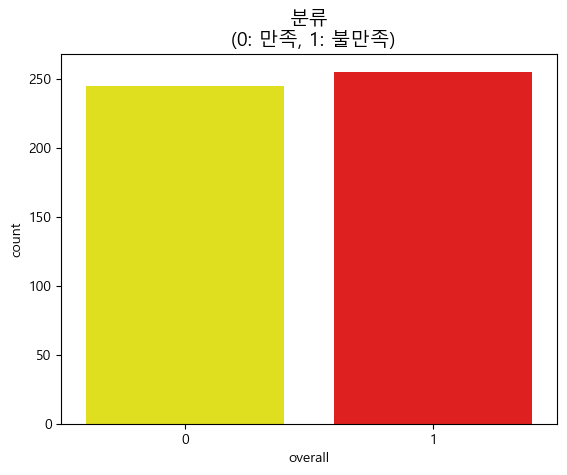

In [3]:
import seaborn as sns

import matplotlib.pyplot as plt

from matplotlib import font_manager, rc

#한글 처리를 위해 폰트 설정

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()

rc('font', family=font_name)

colors = ["yellow", "red"]

sns.countplot(x='overall', data=df, palette=colors)

plt.title('분류\n (0: 만족, 1: 불만족)', fontsize=14)

In [4]:
train_cols = df.columns[0:7]

X = df[train_cols] # 독립변수

y = df["overall"]

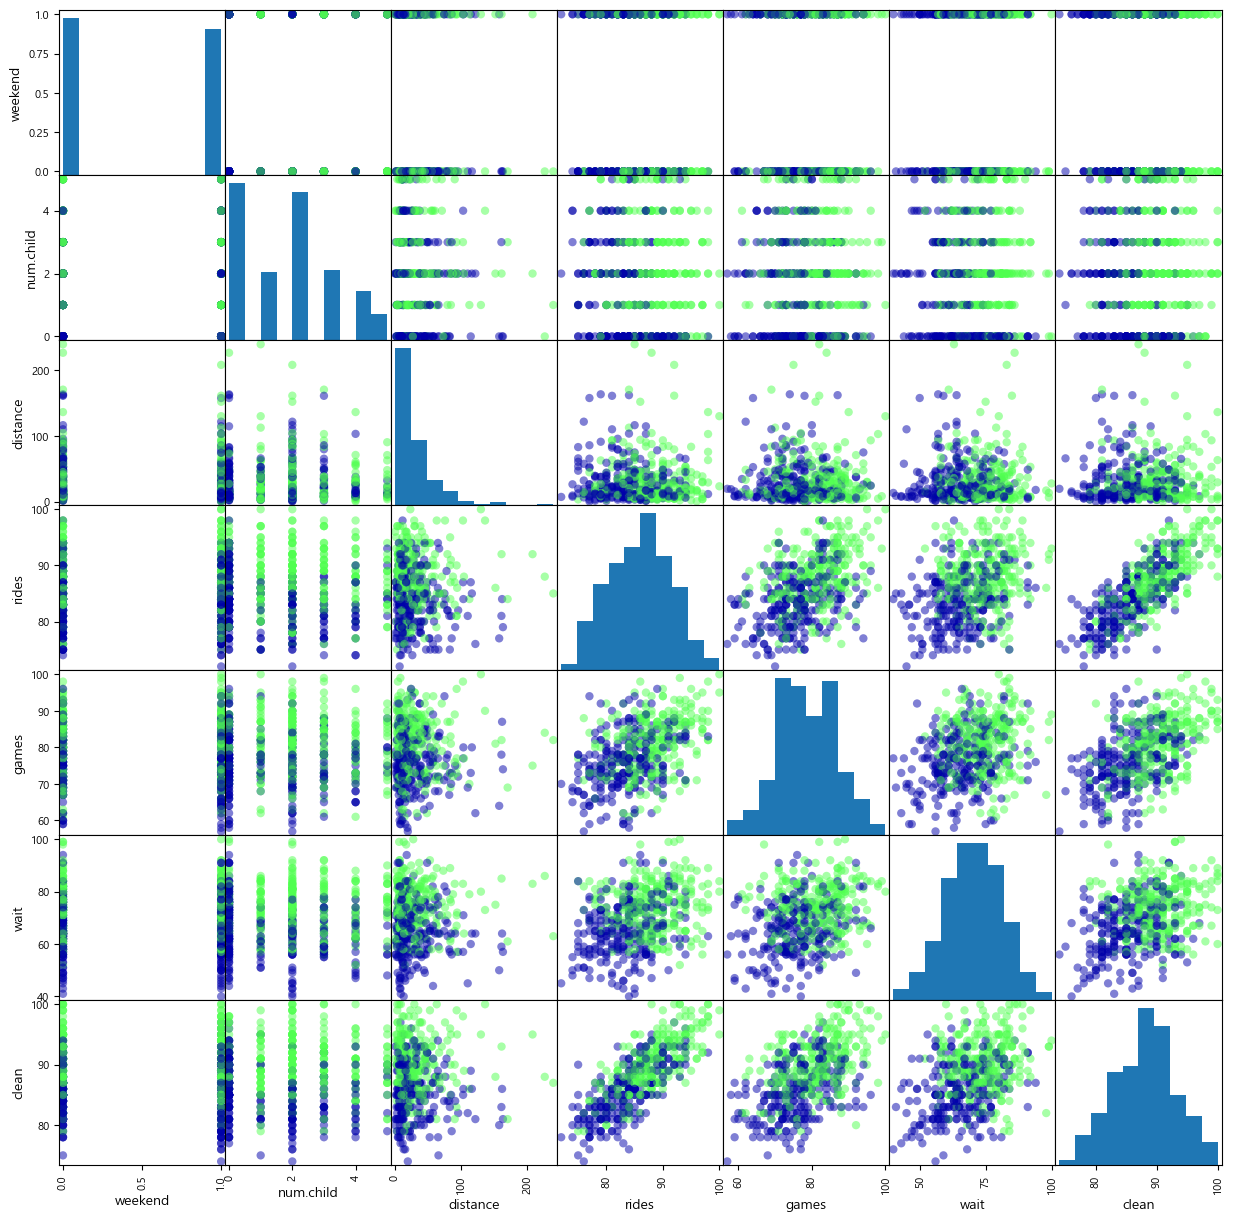

In [5]:
import mglearn

#산점도 행렬 출력

pd.plotting.scatter_matrix(X, c=y, figsize=(15, 15),marker='o', cmap=mglearn.cm3)

plt.show()

In [6]:
#언더샘플링

from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)

X_samp = pd.DataFrame(data=X_sample,columns=train_cols )

y_samp = pd.DataFrame(data=y_sample,columns=['overall'])

df_samp=pd.concat([X_samp,y_samp],axis=1)

df_samp["overall"].value_counts()

overall
0    245
1    245
Name: count, dtype: int64

In [7]:
X = df_samp[train_cols] # 독립변수

y = df_samp["overall"]

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=10)

In [9]:
##############################################

from keras.models import Sequential

from keras.layers import Dense, Dropout

# 분류 모델 구현 함수

def make_model(input_number, hidden_layers, output_number):

    #모델 초기화

    model = Sequential()

    model.add(Dense(hidden_layers[0], activation="relu",

                           input_shape=(input_number,),

                           name="Hidden_1"))

    model.add(Dense(hidden_layers[1], activation="relu",

                           name="Hidden_2"))  

    model.add(Dense(hidden_layers[2], activation="relu",

                           name="Hidden_3"))      

    #드롭아웃 계층 Dropout(p) p라는 확률로

    #   출력 노드의 신호를 보내다 말다 함, 과적합 방지

    model.add(Dropout(0.2))

    #출력층

    model.add(Dense(output_number, activation="sigmoid", name='output'))

    model.compile(loss="mse",

                     optimizer="adam",

                     metrics=["accuracy"])

    return model    

In [10]:
model = make_model(len(X_train.columns), [128,64,32], 1)

<Axes: >

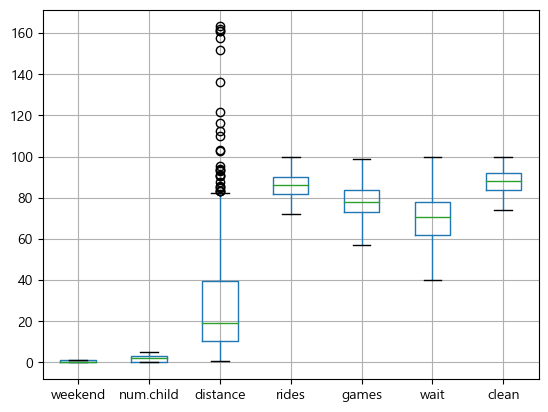

In [11]:
X_train.boxplot()

[[1.         0.         0.10977143 ... 0.5952381  0.16666667 0.65384615]
 [1.         0.4        0.13554088 ... 0.28571429 0.43333333 0.19230769]
 [0.         0.6        0.06495305 ... 0.5        0.48333333 0.30769231]
 ...
 [0.         0.6        0.0730179  ... 0.66666667 0.68333333 0.73076923]
 [1.         0.4        0.41020732 ... 0.33333333 0.3        0.5       ]
 [1.         0.4        0.31775348 ... 0.4047619  0.68333333 0.46153846]]


<Axes: >

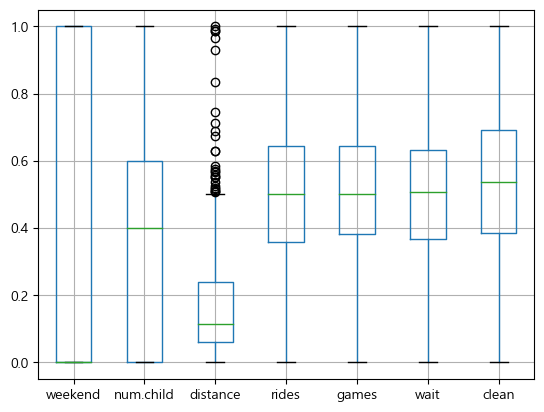

In [12]:
#0~1 범위 변환

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

print(X_train_scaled)

df3=pd.DataFrame(X_train_scaled,columns=train_cols)

df3.boxplot()

In [13]:
from datetime import datetime  

import tensorflow as tf

logdir="c:/logs/" + datetime.now().strftime("%Y%m%d-%H%M%S")  

logdir

'c:/logs/20230720-094318'

In [14]:
from keras.callbacks import EarlyStopping  

tb = tf.keras.callbacks.TensorBoard(log_dir=logdir)

es = EarlyStopping(monitor='val_loss', patience=5)  

hist = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100,callbacks=[tb,es])

Epoch 1/100
10/10 [==============================] - 2s 29ms/step - loss: 0.2525 - accuracy: 0.5016 - val_loss: 0.2460 - val_accuracy: 0.5949
Epoch 2/100
10/10 [==============================] - 0s 13ms/step - loss: 0.2466 - accuracy: 0.5367 - val_loss: 0.2396 - val_accuracy: 0.6076
Epoch 3/100
10/10 [==============================] - 0s 16ms/step - loss: 0.2432 - accuracy: 0.5655 - val_loss: 0.2333 - val_accuracy: 0.6456
Epoch 4/100
10/10 [==============================] - 0s 10ms/step - loss: 0.2385 - accuracy: 0.6518 - val_loss: 0.2271 - val_accuracy: 0.7468
Epoch 5/100
10/10 [==============================] - 0s 8ms/step - loss: 0.2320 - accuracy: 0.6550 - val_loss: 0.2164 - val_accuracy: 0.7468
Epoch 6/100
10/10 [==============================] - 0s 8ms/step - loss: 0.2198 - accuracy: 0.7188 - val_loss: 0.2053 - val_accuracy: 0.7342
Epoch 7/100
10/10 [==============================] - 0s 8ms/step - loss: 0.2113 - accuracy: 0.7316 - val_loss: 0.1929 - val_accuracy: 0.7342
Epoch 8/1

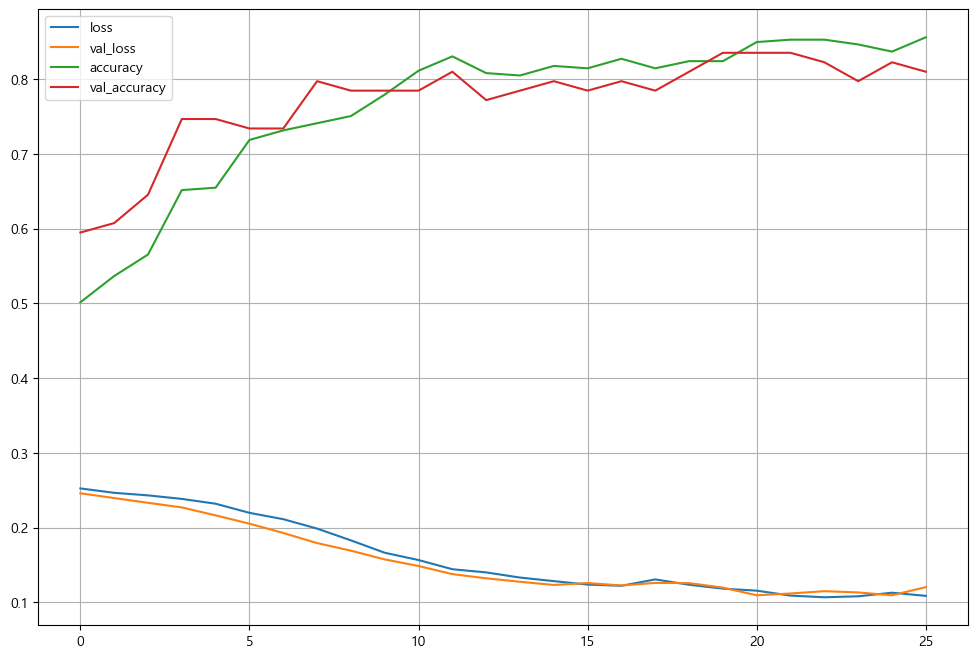

In [15]:
# 모델 학습 과정 표시

plt.figure(figsize=(12,8))

plt.plot(hist.history['loss']) 

plt.plot(hist.history['val_loss'])

plt.plot(hist.history['accuracy'])

plt.plot(hist.history['val_accuracy'])

plt.legend(['loss','val_loss','accuracy','val_accuracy'])

plt.grid()

plt.show()

In [16]:
# 모델 평가

scores = model.evaluate(X_train_scaled, y_train, verbose=1)

print(scores)

print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100)) #학습용

13/13 [==============================] - 0s 3ms/step - loss: 0.1076 - accuracy: 0.8444
[0.10761072486639023, 0.8443877696990967]
accuracy: 84.44%


In [17]:
scores = model.evaluate(X_test_scaled, y_test, verbose=1)

print(scores)

print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100)) #검증용

4/4 [==============================] - 0s 4ms/step - loss: 0.1435 - accuracy: 0.7959
[0.14351621270179749, 0.795918345451355]
accuracy: 79.59%


In [18]:
model.save('c:/workspace/data/rides/rides_keras.h5')

In [19]:
pred=model.predict(X_test_scaled[:5])

pred

1/1 [==============================] - 0s 106ms/step


array([[0.8645175 ],
       [0.02988007],
       [0.07166849],
       [0.20874064],
       [0.60275054]], dtype=float32)

In [21]:
from sklearn.preprocessing import MinMaxScaler

import numpy as np

#새로운 값 예측(주말여부, 자녀수, 거리, 놀이기구만족도, 게임만족도, 대기시간, 청결도)

test_set = [[0, 2, 20, 84, 78, 67, 89]]

test_set_scaled=scaler.transform(test_set)

print(model.predict(test_set_scaled)) # 1일 확률 0%

1/1 [==============================] - 0s 25ms/step
[[0.75172395]]


c:\Users\tjoeun\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [20]:
#새로운 값 예측(주말여부, 자녀수, 거리, 놀이기구만족도, 게임만족도, 대기시간, 청결도)

test_set = [[1, 0, 10, 90, 78, 67, 89]]

test_set_scaled=scaler.transform(test_set)

print(model.predict(test_set_scaled)) # 1일 확률 0%

1/1 [==============================] - 0s 24ms/step
[[0.11589385]]


c:\Users\tjoeun\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [22]:
import joblib

#scaler 백업

joblib.dump(scaler, 'c:/workspace/data/rides/scaler.sav')

['c:/workspace/data/rides/scaler.sav']

In [23]:
#scaler 복원

scaler = joblib.load('c:/workspace/data/rides/scaler.sav')